In [37]:
import numpy as np       # for numeric operations
import pandas as pd      # for dataframe operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [40]:
df.shape

(200, 5)

In [41]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [42]:
df.rename(columns={'Genre': 'Gender'},inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
df.isna().sum().sum()

np.int64(0)

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [49]:
df.drop(columns=['CustomerID'], axis=1, inplace=True)

In [50]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

<Axes: >

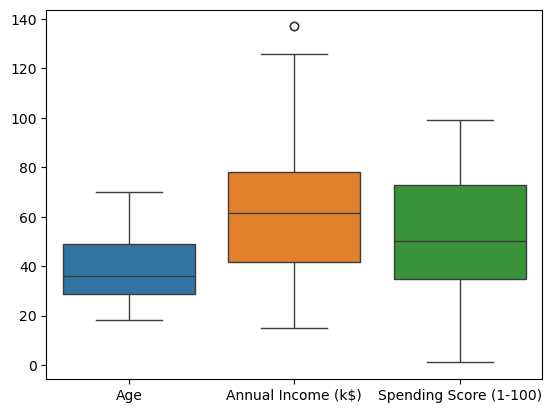

In [51]:
sns.boxplot(data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

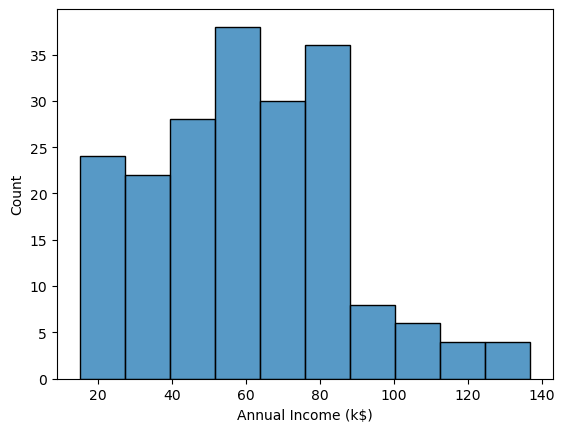

In [52]:
sns.histplot(df['Annual Income (k$)'])

<Axes: xlabel='Age', ylabel='Count'>

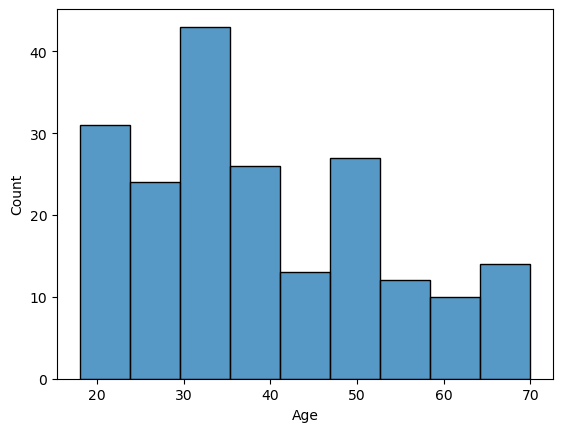

In [53]:
sns.histplot(df['Age'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

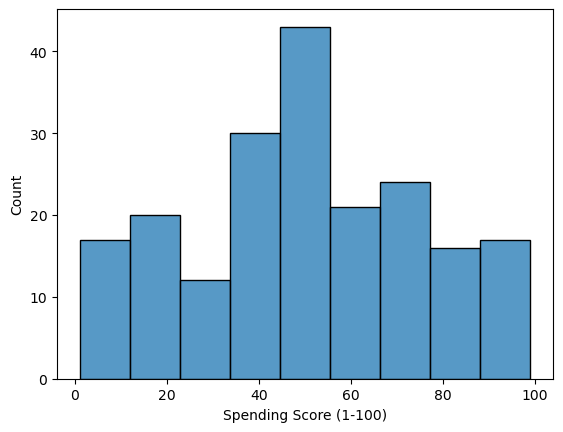

In [54]:
sns.histplot(df['Spending Score (1-100)'])

<Axes: xlabel='Gender', ylabel='count'>

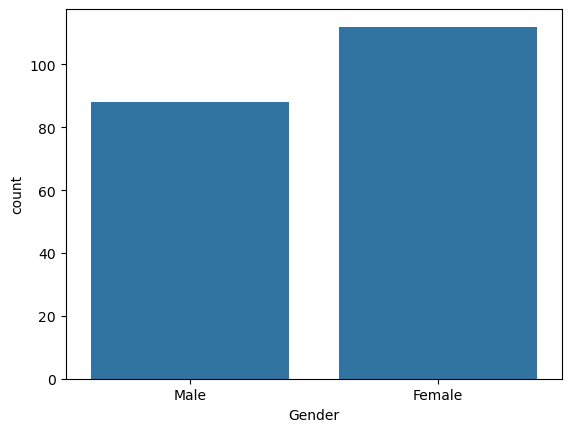

In [55]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

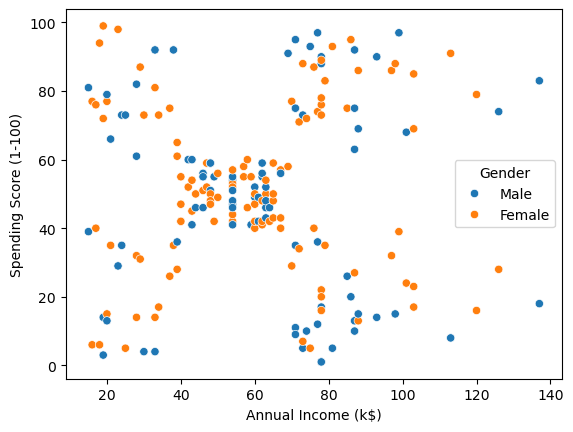

In [56]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")

In [57]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:].astype(float))
df.head(3)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913


In [58]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
df["Gender"] = le.fit_transform(df["Gender"])

In [62]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913


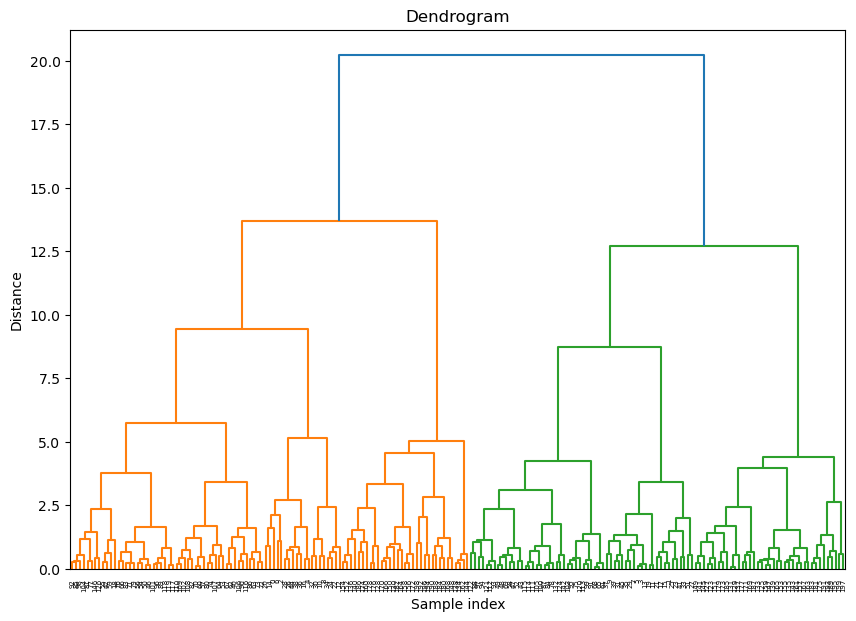

In [63]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
matrix = linkage(df, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(df)

df['Cluster1'] = clusters


In [64]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster1
0,1,-1.424569,-1.738999,-0.434801,0
1,1,-1.281035,-1.738999,1.195704,1
2,0,-1.352802,-1.700830,-1.715913,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

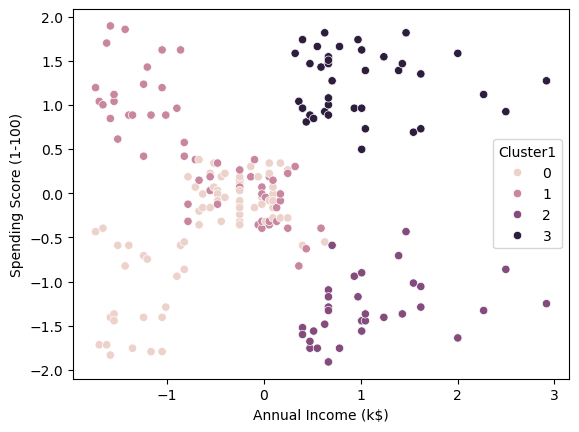

In [65]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster1')